## SU21: DATA VISUALIZATION : Final Project
## Project Title: Analysis of Cricket over period of time

### By : Uday Sankat B

##### Import libraries those are used across project code.

In [4]:
!pip install bar_chart_race

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 156 kB 8.7 MB/s 


In [5]:
import os
import warnings
import pycountry
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
import plotly.express as px
import bar_chart_race as bcr
from vega_datasets import data
from IPython.display import HTML
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
warnings.filterwarnings('ignore')

##### Function to read the '.csv' format data files

In [6]:
def read_data(path):
    df = pd.read_csv(path)
    df.columns = [col.replace(' ','_') for col in df.columns]
    print('Number of records:',len(df))
    return df

##### Set data files root path

In [7]:
raw_data_path = "/content/sample_data/raw_data/"
#raw_data_path

In [8]:
play_forms = ['Test','ODI','T20I']
#raw_data_path = 'raw_data/'
team_match_results_file = raw_data_path + 'Men_All_Team_Match_Results.csv'
team_bowling_stats = raw_data_path + 'Men_All_Team_Bowling_Stats.csv'
team_batting_stats = raw_data_path + 'Men_All_Team_Batting_Stats.csv'
player_innings_stats = raw_data_path + 'Men_All_Player_Innings_Stats.csv'
player_data = raw_data_path +'personal_male.csv'

##### Read all data files used across project

In [9]:
tm_mt_rslt_df = read_data(team_match_results_file)
tm_bwl_sts_df = read_data(team_bowling_stats)
tm_bt_sts_df = read_data(team_batting_stats)
plyr_inng_sts_df = read_data(player_innings_stats)
plyr_data_df = read_data(player_data)

Number of records: 14991
Number of records: 45
Number of records: 45
Number of records: 407595
Number of records: 3856


### Data Preprocessing
##### Project mainly used some preformatted data files from following locations,which further merged multiple play format data files into limited number of files depending on similarity of data and added additional column to indicate the play format of data.  Also renamed column headers to replace space with '_' character so that it will be easy to read in program.

##### https://www.kaggle.com/cclayford/cricinfo-statsguru-data 
##### https://www.kaggle.com/devsb13/international-cricket-players-data


### Data used to prepare visualizations

**The result of each match played by mens team in multiple formats Men_All_Team_Match_Results.csv**
- Play_Format - The match play format Test, ODI or T20I
- Result - The result of match for country Won or Lost
- Match_Year - Year when match held
- Country - The name of country who Won or Lost

**The batting stats of each mens cricket team Men_All_Team_Batting_Stats.csv**
- Play_Format - The match play format Test, ODI or T20I
- Country - The name of Team's country
- Avg_Runs_Per_Wicket_Batting - The average number of runs partnership between wickets
- Avg_Runs_Per_Six_Balls_Batting - The average number of runs per six bowl over
- Matches_Won - Number of matches won so far
- Matches_Lost - Number of matches lost so far
- Matches_Tied - Number of matches tied so far
- Matches_With_No_Result - Number of matches with no result
- Win/Loss_Ratio - The ratio beween number of matches wins and lost

**The innings stats for each men team player Men_All_Player_Innings_Stats.csv**
- Play_Format - The match play format Test, ODI or T20I
- Innings_Player - The name of player
- Innings_Runs_Scored_Num - Number runs layer scored in the match
- Innings_Date - The date when the math inning payed
- Innings_Wickets_Taken - Number of wickets taken by payer in the match

**The pesonal information of mens team player personal_male.csv**
- name - The name of palyer
- Player_country - Player's country

In [10]:
tm_mt_rslt_df.head(5)

Play_Format Result     Margin                  Match Home/Away       Ground  \
0        T20I    Won   100 runs    England v Australia      Home  Southampton   
1        T20I   Lost     2 runs    England v Sri Lanka      Home  Southampton   
2        T20I   Lost  5 wickets     England v Pakistan      Home      Bristol   
3        T20I   Lost    77 runs    Australia v England      Away       Sydney   
4        T20I   Lost    15 runs  England v West Indies      Home     The Oval   

  Match_Date Match_Month  Match_Year Match_Period  Matches  Country  
0    6/13/05         Jun        2005        5-Jun        1  England  
1    6/15/06         Jun        2006        6-Jun        1  England  
2    8/28/06         Aug        2006        6-Aug        1  England  
3     1/9/07         Jan        2007        7-Jan        1  England  
4    6/28/07         Jun        2007        7-Jun        1  England

In [11]:
tm_mt_rslt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14991 entries, 0 to 14990
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Play_Format   14991 non-null  object
 1   Result        14991 non-null  object
 2   Margin        14970 non-null  object
 3   Match         14991 non-null  object
 4   Home/Away     14991 non-null  object
 5   Ground        14991 non-null  object
 6   Match_Date    14991 non-null  object
 7   Match_Month   14991 non-null  object
 8   Match_Year    14991 non-null  int64 
 9   Match_Period  14991 non-null  object
 10  Matches       14991 non-null  int64 
 11  Country       14991 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.4+ MB


In [12]:
tm_bwl_sts_df.head(2)

Play_Format    Country  Avg_Runs_Per_Wicket_Bowling  \
0         ODI    England                        30.41   
1         ODI  Australia                        27.28   

   Avg_Runs_Per_Six_Balls_Bowling  Number_Of_Team_Innings_Bowling  \
0                            4.81                             738   
1                            4.69                             942   

   Highest_Team_Score_Bowling  Lowest_Completed_Score_Bowling  
0                         398                              45  
1                         481                              45

In [13]:
tm_bwl_sts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Play_Format                     45 non-null     object 
 1   Country                         45 non-null     object 
 2   Avg_Runs_Per_Wicket_Bowling     45 non-null     float64
 3   Avg_Runs_Per_Six_Balls_Bowling  45 non-null     float64
 4   Number_Of_Team_Innings_Bowling  45 non-null     int64  
 5   Highest_Team_Score_Bowling      45 non-null     int64  
 6   Lowest_Completed_Score_Bowling  45 non-null     int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 2.6+ KB


In [14]:
tm_bt_sts_df[['Play_Format','Country','Avg_Runs_Per_Wicket_Batting','Avg_Runs_Per_Six_Balls_Batting',
            'Matches_Won','Matches_Lost','Matches_Tied','Matches_With_No_Result','Win/Loss_Ratio']].head(5)

Play_Format       Country  Avg_Runs_Per_Wicket_Batting  \
0         ODI       England                        31.10   
1         ODI     Australia                        34.14   
2         ODI  South Africa                        35.76   
3         ODI   West Indies                        30.20   
4         ODI   New Zealand                        29.21   

   Avg_Runs_Per_Six_Balls_Batting  Matches_Won  Matches_Lost  Matches_Tied  \
0                            4.91          375           334             9   
1                            5.01          575           331             9   
2                            5.11          385           216             6   
3                            4.78          401           381            10   
4                            4.82          351           374             7   

   Matches_With_No_Result  Win/Loss_Ratio  
0                      28           1.122  
1                      34           1.737  
2                      18           1.782  
3                      30           1.052  
4                      40           0.938

In [15]:
tm_bt_sts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Play_Format                     45 non-null     object 
 1   Country                         45 non-null     object 
 2   Team_Matches_Played             45 non-null     int64  
 3   Matches_Won                     45 non-null     int64  
 4   Matches_Lost                    45 non-null     int64  
 5   Matches_Tied                    45 non-null     int64  
 6   Matches_With_No_Result          45 non-null     int64  
 7   Win/Loss_Ratio                  45 non-null     float64
 8   Avg_Runs_Per_Wicket_Batting     45 non-null     float64
 9   Avg_Runs_Per_Six_Balls_Batting  45 non-null     float64
 10  Number_Of_Team_Innings_Batting  45 non-null     int64  
 11  Highest_Team_Score_Batting      45 non-null     int64  
 12  Lowest_Completed_Score_Batting  45 non

In [16]:
plyr_inng_sts_df[['Play_Format','Country','Innings_Player','Innings_Runs_Scored','Innings_Runs_Scored_Num','Innings_Date','Innings_Wickets_Taken']].head(5)

Play_Format  Country Innings_Player Innings_Runs_Scored  \
0         ODI  England         JJ Roy                 180   
1         ODI  England       AD Hales                 171   
2         ODI  England         JJ Roy                 162   
3         ODI  England     AJ Strauss                 158   
4         ODI  England     AJ Strauss                 154   

  Innings_Runs_Scored_Num Innings_Date Innings_Wickets_Taken  
0                     180      1/14/18                   NaN  
1                     171      8/30/16                   NaN  
2                     162      6/29/16                   NaN  
3                     158      2/27/11                   NaN  
4                     154      7/12/10                   NaN

In [17]:
plyr_inng_sts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407595 entries, 0 to 407594
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Play_Format                    407595 non-null  object 
 1   Innings_Player                 407595 non-null  object 
 2   Innings_Runs_Scored            203974 non-null  object 
 3   Innings_Runs_Scored_Num        203974 non-null  object 
 4   Innings_Minutes_Batted         203974 non-null  object 
 5   Innings_Batted_Flag            203974 non-null  float64
 6   Innings_Not_Out_Flag           203974 non-null  float64
 7   Innings_Balls_Faced            203974 non-null  object 
 8   Innings_Boundary_Fours         203974 non-null  object 
 9   Innings_Boundary_Sixes         203974 non-null  object 
 10  Innings_Batting_Strike_Rate    203974 non-null  object 
 11  Innings_Number                 407595 non-null  object 
 12  Opposition                    

In [18]:
plyr_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3856 entries, 0 to 3855
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          3856 non-null   object
 1   fullName      3856 non-null   object
 2   dob           3856 non-null   object
 3   country       3856 non-null   object
 4   birthPlace    3856 non-null   object
 5   nationalTeam  3788 non-null   object
 6   teams         3856 non-null   object
 7   battingStyle  3850 non-null   object
 8   bowlingStyle  3375 non-null   object
dtypes: object(9)
memory usage: 271.2+ KB


In [19]:
plyr_data_df[['name','country']].head(5)

name   country
0  Aakash Chopra     India
1   Aamer Hameed  Pakistan
2    Aamer Hanif  Pakistan
3    Aamer Malik  Pakistan
4    Aamer Nazir  Pakistan

***Analyze the teams match results statistics for each play format using stacked bar chart.***

In [20]:
tm_bt_sts_df_ft = tm_bt_sts_df[['Play_Format', 'Country', 'Matches_Won',
       'Matches_Lost', 'Matches_Tied', 'Matches_With_No_Result']].sort_values(by=['Matches_Won'],ascending=False)
tm_bt_sts_df_ft.head(2)

Play_Format    Country  Matches_Won  Matches_Lost  Matches_Tied  \
1         ODI  Australia          575           331             9   
5         ODI      India          513           424             9   

   Matches_With_No_Result  
1                      34  
5                      41

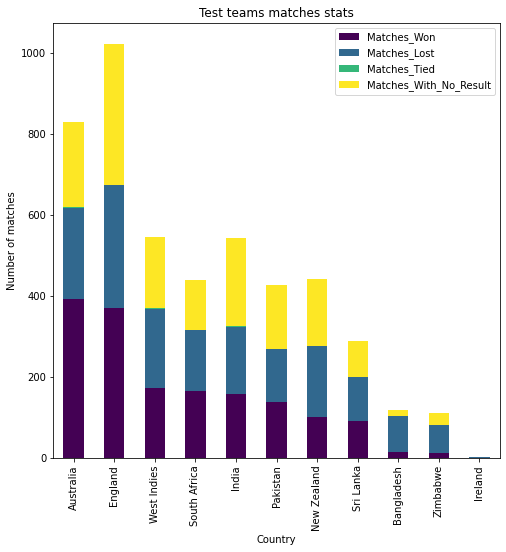

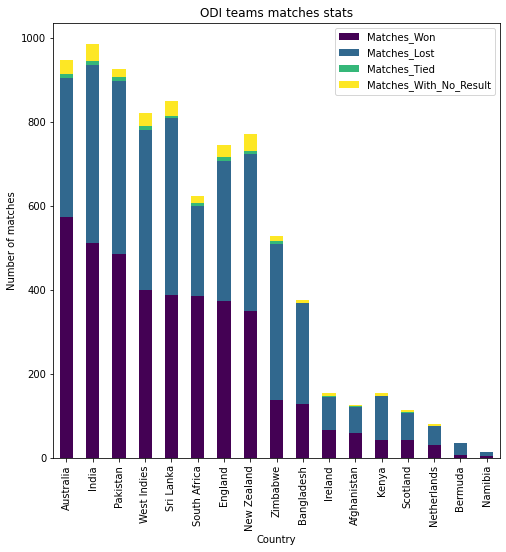

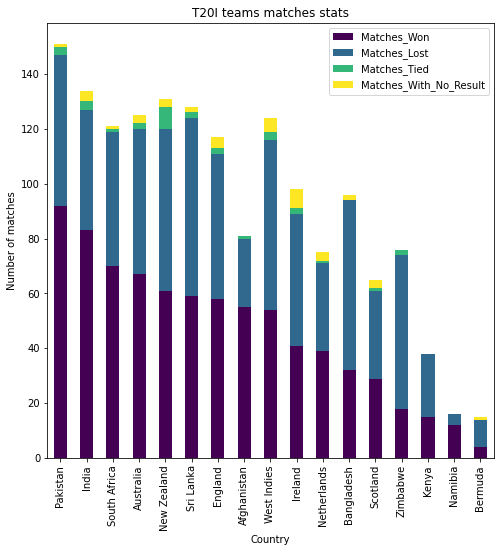

In [21]:
for form in play_forms:
    tm_bt_sts_df_ft[tm_bt_sts_df_ft.Play_Format ==form].plot(x='Country', kind='bar', stacked=True,sort_columns=True,
        title= form + ' teams matches stats',figsize=(8,8),colormap='viridis',ylabel='Number of matches')

***Analyze the teams match results statistics for each play format using plotly's sunburst chart.***

In [22]:
fn_tot_mtchs = lambda row: row['Matches_Won'] + row['Matches_Lost'] + row['Matches_Tied'] + row['Matches_With_No_Result'] 
col = tm_bt_sts_df_ft.apply(fn_tot_mtchs, axis=1) # get column data with an index
tm_bt_sts_df_ft = tm_bt_sts_df_ft.assign(Total_Matches=col.values)

In [23]:
df_countries = tm_bt_sts_df_ft.melt(id_vars=["Play_Format", "Country",'Total_Matches'], 
        var_name="Stats", 
        value_name="Number_of_matches")

df_countries = df_countries.sort_values(by=['Play_Format','Country'],ascending=False)
df_countries.head(2)

Play_Format   Country  Total_Matches         Stats  Number_of_matches
39        Test  Zimbabwe            110   Matches_Won                 12
84        Test  Zimbabwe            110  Matches_Lost                 70

In [24]:
fig = px.sunburst(df_countries, path=['Play_Format','Country','Total_Matches','Stats','Number_of_matches'], values='Number_of_matches',
                  color='Country', hover_data=['Stats'],
                  color_continuous_scale='Viridis', width= 2000, height= 1000)
fig.show()

**Compare Stacked bar chart VS Plotly Sunburst chart visualization methods**
-	Stacked bar chart does not support additional dimension for play format, however sunburst chart does.
-	Stacked bar providing independent play format comparative information side by side for each country, whereas sunburst chart providing information in circular shape and pie format.
-	Sunburst chart covers same information compared to multiple stacked bar chart, however for small numbers the pie size is very small so that difficult to read text, but it can be read using tooltip text on the pie.

**Data Observations**
-	Each country performance is different across paly formats
-	The number of wins are fairly compositable between countries
-	Each country's number of matches are different, and it seems countries number matches varies depending on when they are started to play, events organized in the year etc.
-	The teams playing since log time have balanced statistics.

**Analyze similar data using the parallel coordinates plot to compare of win, loss, tied and no reults possibilies in each format**

Text(0.5, 1.0, 'Match play format vs match result vs number of matches')

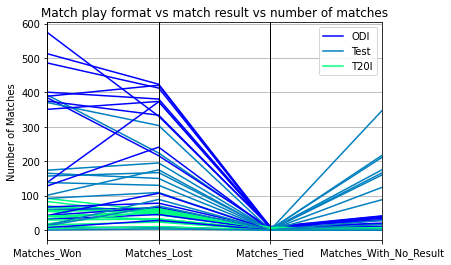

In [25]:
tm_bt_sts_df_ft = tm_bt_sts_df[['Play_Format', 'Matches_Won',
       'Matches_Lost', 'Matches_Tied', 'Matches_With_No_Result']].sort_values(by=['Matches_Won'],ascending=False)

g=parallel_coordinates(tm_bt_sts_df_ft, "Play_Format",colormap='winter')
g.set_ylabel('Number of Matches')
g.set_title('Match play format vs match result vs number of matches')

**Data Observations**
-	The ODI and T20I match format has higher chances of win or loss results vs match tied or no results
-	The Test match format has less win or loss chances compare to no results

**Analyze relationship beteen average runs per wicket, average runs per over and win/loss ratio using the Seaborn pairplot**

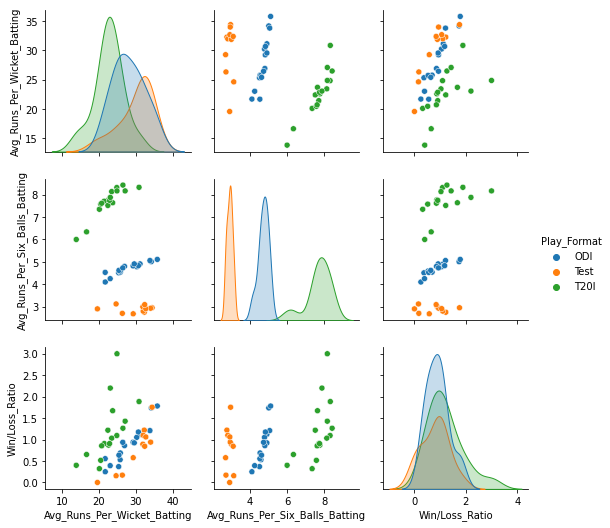

In [26]:
tm_bt_sts_df_ft = tm_bt_sts_df[['Play_Format','Country','Avg_Runs_Per_Wicket_Batting','Avg_Runs_Per_Six_Balls_Batting','Win/Loss_Ratio']]
g=sns.pairplot(tm_bt_sts_df_ft, hue='Play_Format')

**Data Observations:**
-	The average runs per six balls is T20I > ODI > Test
-	The average runs per wicket batting is Test > ODI > T20I
-	The win and loss ratios are ODI > T20I > Test
-	The win loss ratio is definitely impacted by the runs per six over or runs per wicket
-	The formats Test, ODI and T20I is played with 90 overs per day (max 5 Days), 50 overs per team and 20 overs per team. And looking the above stats, the if we look for the runs per wicket or runs per six balls are ordered higher to lower for each format is T20I > ODI > Test.


**Analyze the teams win and loss ration with teams playing each format**

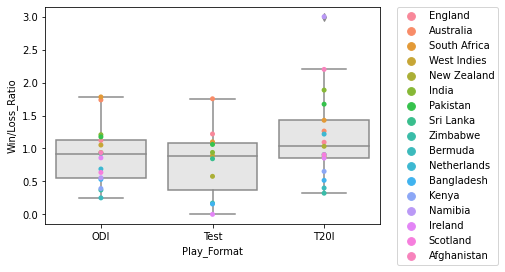

In [27]:
g=sns.boxplot(x="Play_Format", y="Win/Loss_Ratio", data=tm_bt_sts_df_ft, color="0.9")
g=sns.stripplot(x='Play_Format', y='Win/Loss_Ratio', data=tm_bt_sts_df_ft, jitter=False,hue='Country')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


**Data Observations:**
-	The popularity of play format among countries is in order higher to lower is T20I, ODI and Test
-	The countries have win/loss greater that mean is consistently good performers for each format.
-	Not all countries play each format.

**Aanalyze each format played over decades in history and how it was become popular**

In [28]:
team_mtch_year = tm_mt_rslt_df[['Play_Format', 'Match_Year','Match']]

fn_decade = lambda row: row['Match_Year'] - (row['Match_Year']%10) # define a function for the new column
col = team_mtch_year.apply(fn_decade, axis=1) # get column data with an index
team_mtch_year = team_mtch_year.assign(Match_Decade=col.values) # assign values to column 'Match_Decade'

In [29]:
team_mtch_decade = team_mtch_year.groupby(['Play_Format','Match_Decade']).size()
df_team_mtch_decade = team_mtch_decade.to_frame(name = 'Number_of_matches').reset_index()
df_decade = df_team_mtch_decade.pivot(index='Match_Decade', columns='Play_Format', values='Number_of_matches').replace(np.nan, 0)

Text(0, 0.5, 'Number of Matches')

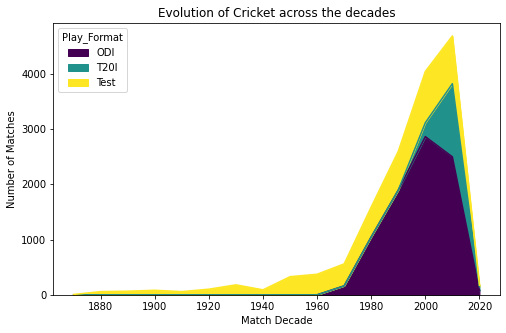

In [30]:
df_decade.plot(kind='area', figsize=(8,5),colormap='viridis')
plt.title('Evolution of Cricket across the decades')
plt.xlabel ('Match Decade')
plt.ylabel ('Number of Matches')

**Data Observations**
-	The Test play format is the oldest format which was started to play in 1870's and increased number of matches played every decade gradually.
-	The ODI format was introduced in decade of 1960 to 1970 and got popular rapidly in every decade afterword’s
-	The T20I format was introduced in decade of 1990 to 2000 got rapid popularity in subsequent decade, as result the ODI and Test matches numbers reduced comparatively.  

Text(0, 0.5, 'Number of Matches')

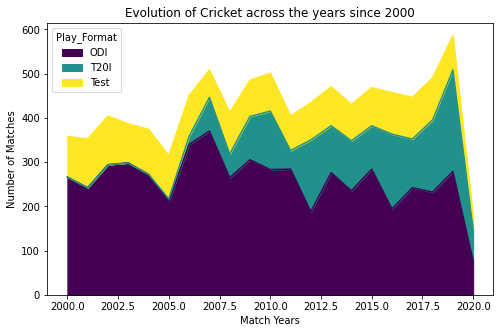

In [31]:
team_mtch_after_2000 = team_mtch_year[(team_mtch_year.Match_Year >= 2000)]
team_mtch_after_2000 = team_mtch_after_2000.groupby(['Play_Format','Match_Year']).size()
team_mtch_after_2000 = team_mtch_after_2000.to_frame(name = 'Number_of_matches').reset_index()

df_years = team_mtch_after_2000.pivot(index='Match_Year', columns='Play_Format', values='Number_of_matches').replace(np.nan, 0)
df_years.plot(kind='area', figsize=(8,5),colormap='viridis')
plt.title('Evolution of Cricket across the years since 2000')
plt.xlabel ('Match Years')
plt.ylabel ('Number of Matches')

**Data Observations:**
-	Even T20I got rapid popularity the ODI format is still most popular format in last 20 years and Test format is running with consistent popularity.
-	From last 4-5 years the ODI and T20I formats are competing each other in popularity.

**Analyze the countries wins in each format over the span of decades using altair circle plot vs seaborn bar plot**

In [32]:
team_mtch_year = tm_mt_rslt_df[['Play_Format','Result','Match_Year','Country']][tm_mt_rslt_df.Result=='Won']
fn_decade = lambda row: row['Match_Year'] - (row['Match_Year']%10) # define a function for the new column
col = team_mtch_year.apply(fn_decade, axis=1) # get column data with an index
team_mtch_year = team_mtch_year.assign(Match_Decade=col.values) # assign values to column 'c'

team_mtch_year = team_mtch_year.groupby(['Play_Format','Match_Decade','Country']).size()
df_tm_home_vs_away_stats = team_mtch_year.to_frame(name = 'Number_of_matches').reset_index()
df = df_tm_home_vs_away_stats.sort_values(by=['Play_Format','Country'],ascending=True)

In [33]:
play_forms = ['Test','ODI','T20I']
for form in play_forms:
    display(alt.Chart(df, title=form +" Wins for each Country per Decade").mark_circle(
        opacity=0.8,
        stroke='black',
        strokeWidth=1
    ).encode(
        alt.X('Match_Decade:O', axis=alt.Axis(labelAngle=0)),
        alt.Y('Country:N'),
        alt.Size('Number_of_matches:Q',
            scale=alt.Scale(range=[0, 1000]),
            legend=alt.Legend(title='Number of Matches')
        ),
        alt.Color('Country:N', legend=None)
    ).properties(
        width=700,
        height=500
    ).transform_filter(
        alt.datum.Play_Format == form
    ))

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

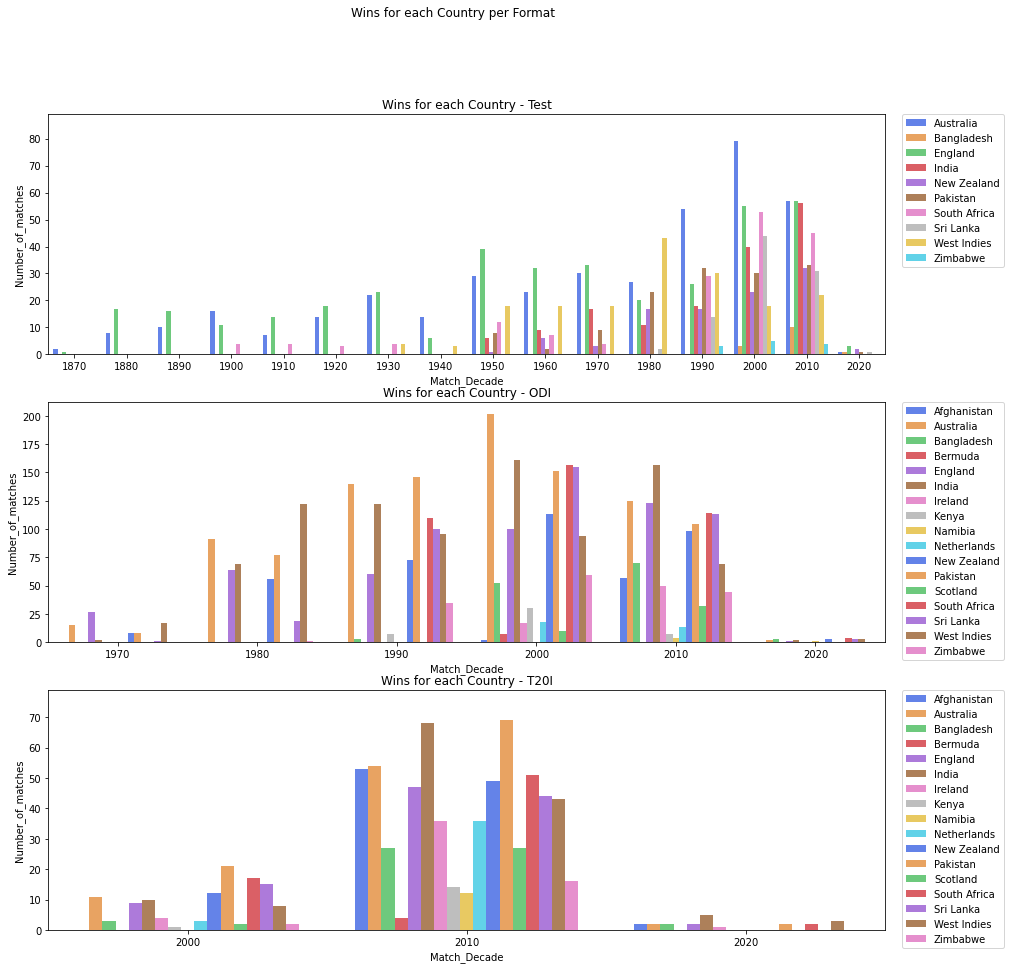

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharey=False)
fig.suptitle('Wins for each Country per Format')

play_forms = ['Test','ODI','T20I']
i =0
for form in play_forms:
    dta_form = df[df.Play_Format== form]
    ymax = dta_form['Number_of_matches'].max()
    sns.barplot(ax=axes[i],x="Match_Decade", y="Number_of_matches", hue='Country',
                 alpha=.7, palette="bright", 
                 data=dta_form)
    axes[i].set_ylim(0,ymax+10)
    axes[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    axes[i].set_title("Wins for each Country - " + form)
    i += 1

**Compare bar chart VS altair cirlce chart visualization methods**

- The altair chart providing matrix for country and nmber of matces wins vs barchart is privding side by side bar charts.
- Bar charts are clear to recognize the country and number of wins, however circle chart it can be dificult to recognize number of wins depending on cirlce size even legends are mentioned, but somehow it's also good form to reprent data.

**Data Observations**

**Test:**
- The countries like India and New Zealand are improved winning performace decade over decade.
- The countries like Australia, Sri Lanka and West Indies are reduced winning performace decade over last couple of decades.
- New countries impacted performace of existing countries and introduced more competitive nature in this format 

**ODI:**
- The countries are consistant with the winning performace over the decades even number of countries joined to play and number of matches also got increased.
- New teams made minor impact on existing teams performance
- It seems ODI is most competative format of cricket and teams race to maintain their performance.

**T20I:**
- The Asian countries have good performers in this format compare to other continents.
- There are specific countries are on top in this format and there is tuff competetion between top countries.

**Analyze the teams winning history at home grounds vs foreign grounds using bar chart and altair population pyramid**

In [35]:
tm_home_vs_away = tm_mt_rslt_df[(tm_mt_rslt_df.Result =='Won')]
tm_home_vs_away = tm_home_vs_away[['Play_Format', 'Match_Year','Home/Away','Country']]
tm_home_vs_away_stats = tm_home_vs_away.groupby(['Play_Format','Home/Away','Country']).size()
df_tm_home_vs_away_stats = tm_home_vs_away_stats.to_frame(name = 'Number_of_matches').reset_index()
df_home_away = df_tm_home_vs_away_stats.sort_values(by=['Play_Format','Country'],ascending=True)

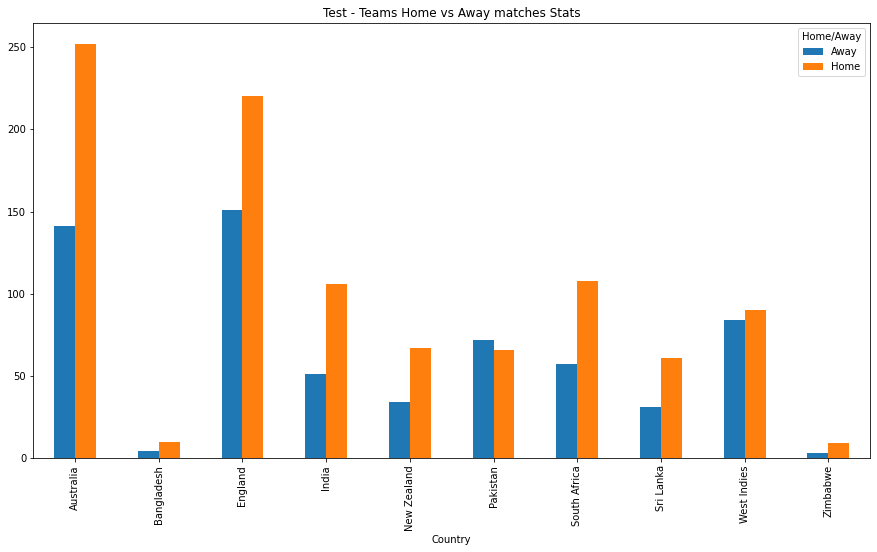

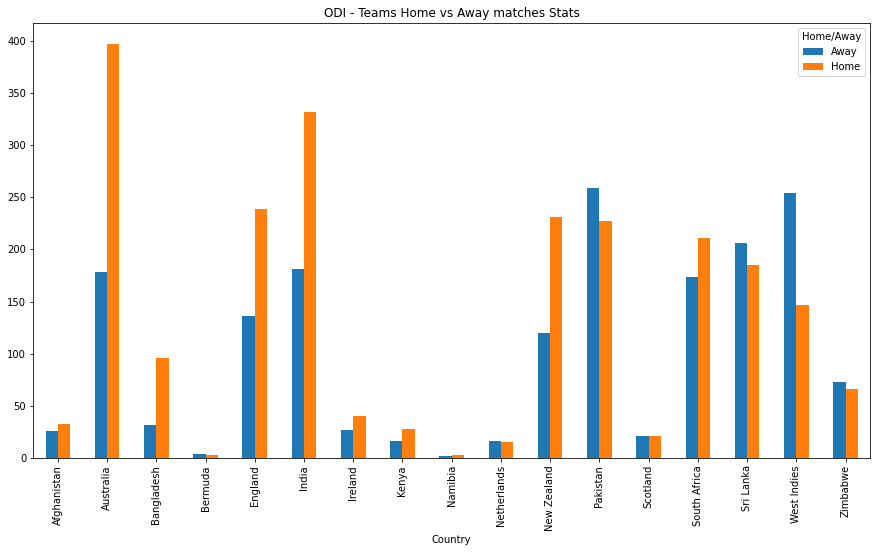

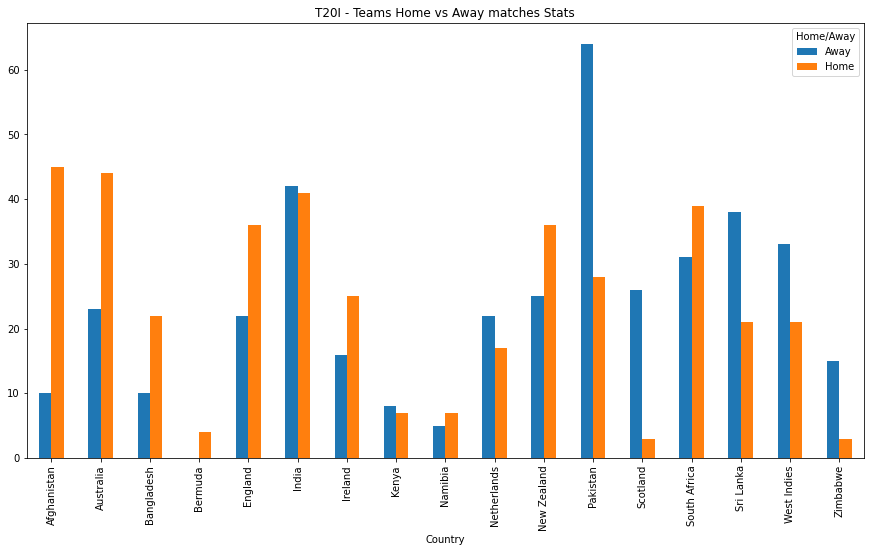

In [36]:
for form in play_forms:
    df_hme_awy = df_home_away[df_home_away.Play_Format==form].pivot(index='Country', 
                                   columns='Home/Away', 
                                   values='Number_of_matches').replace(np.nan, 0)
    df_hme_awy.plot(kind='bar',figsize=(15,8), title= form + ' - Teams Home vs Away matches Stats' )

In [37]:
tm_home_vs_away_stats = tm_home_vs_away.groupby(['Play_Format','Home/Away','Country']).size()
df_tm_home_vs_away_stats = tm_home_vs_away_stats.to_frame(name = 'Number_of_matches').reset_index()
df_hme_awy = df_tm_home_vs_away_stats.sort_values(by=['Play_Format','Country'],ascending=True)
df_hme_awy = df_hme_awy.rename(columns = {'Home/Away':'Home_Away'})

In [38]:
play_forms = ['Test','ODI','T20I']
for form in play_forms:
    df = df_hme_awy[df_hme_awy.Play_Format== form].pivot(index='Country', 
                                   columns='Home_Away', 
                                   values='Number_of_matches').replace(np.nan,
                                                                       0).reset_index().melt(id_vars='Country',
                                                                                             var_name='Home_Away', 
                                                                                             value_name='Number_of_matches').sort_values(by=['Country','Home_Away'],ascending=True)


    base = alt.Chart(df, title="Wins -" + form).transform_calculate(
        place=alt.expr.if_(alt.datum.Home_Away == 'Home', 'Home', 'Away')
    ).properties(
        width=250
    )

    color_scale = alt.Scale(domain=['Home', 'Away'],
                            range=['#1f77b4', '#e377c2'])

    left = base.transform_filter(
        alt.datum.Home_Away == 'Home'
    ).encode(
        y=alt.Y('Country:O', axis=None),
        x=alt.X('Number_of_matches:Q',
                title='Number of Matches',
                sort=alt.SortOrder('descending')),
        color=alt.Color('Home_Away:N', scale=color_scale, legend=None)
    ).mark_bar().properties(title='Home')

    middle = base.encode(
        y=alt.Y('Country:O', axis=None),
        text=alt.Text('Country:N'),
    ).mark_text().properties(width=70)

    right = base.transform_filter(
        alt.datum.Home_Away == 'Away'
    ).encode(
        y=alt.Y('Country:O', axis=None),
        x=alt.X('Number_of_matches:Q', title='Number of Matches'),
        color=alt.Color('Home_Away:N', scale=color_scale, legend=None)
    ).mark_bar().properties(title='Away')

    display(alt.concat(left, middle, right, spacing=5))

alt.ConcatChart(...)

alt.ConcatChart(...)

alt.ConcatChart(...)

**Compare bar chart VS Altair population pyramid visualization methods**
-	The bar chart has x axis as countries and y axis as number of matched won with two adjacent bars for each country home and away counts, whereas with the population pyramid the x axis is count of won’t matches and y axis is countries with two separate left and right horizontal bars for home and away counts.
-	Both methods are serving same purpose, but we found population pyramid chart is better over bar chart that uses less horizontal space and provide effective comparison vertically with rational utilization of space.

**Data Observations:**

**Test**
-	Most of countries had better performance on home grounds except few of them like Pakistan and West Indies.
-	It could be possible countries may not host events and they made themselves in position to win in foreign countries.

**ODI**
-	Most of results are similar to Test format however countries like Sri Lanka, Afghanistan, Zimbabwe are also good performer on foreign grounds.

**T20I**

-	With this format result is mixed for each country, country like Scotland and Bermuda have very bad on foreign grounds.

In [39]:
tm_home_vs_away_stats = tm_mt_rslt_df.groupby(['Play_Format','Home/Away','Country','Result']).size()
df_tm_home_vs_away_stats = tm_home_vs_away_stats.to_frame(name = 'Number_of_matches').reset_index()
df_hme_away = df_tm_home_vs_away_stats.sort_values(by=['Play_Format','Country'],ascending=True)

df = tm_mt_rslt_df.groupby(['Play_Format','Home/Away','Country'])['Home/Away'].count()
df_tot_mtch = df.to_frame(name = 'Home_away_tot_match').reset_index()

df_home_away = pd.merge(df_hme_away, df_tot_mtch, how='inner')
df_home_away

Play_Format Home/Away      Country Result  Number_of_matches  \
0           ODI      Away  Afghanistan   Aban                  3   
1           ODI      Away  Afghanistan   Lost                 25   
2           ODI      Away  Afghanistan    N/R                  2   
3           ODI      Away  Afghanistan    Won                 26   
4           ODI      Home  Afghanistan   Lost                 38   
..          ...       ...          ...    ...                ...   
383        Test      Away     Zimbabwe   Lost                 37   
384        Test      Away     Zimbabwe    Won                  3   
385        Test      Home     Zimbabwe   Draw                 18   
386        Test      Home     Zimbabwe   Lost                 33   
387        Test      Home     Zimbabwe    Won                  9   

     Home_away_tot_match  
0                     56  
1                     56  
2                     56  
3                     56  
4                     73  
..                   ...  
383                   51  
384                   51  
385                   60  
386                   60  
387                   60  

[388 rows x 6 columns]

In [40]:
def prcnt_calc (row):
    prcnt = round(row['Number_of_matches'] / row['Home_away_tot_match'] *100,2)
    if row['Result'] == 'Lost':
        return prcnt*1
    else:
        return prcnt

col = df_home_away.apply(prcnt_calc, axis=1)  # get column data with an index
df_home_away = df_home_away.assign(prct_matches_rslt=col.values)

df_home_away = df_home_away[(df_home_away.Result == 'Won') | (df_home_away.Result == 'Lost')]
df_hme_awy = df_home_away.rename(columns = {'Home/Away':'Home_Away'})

**Analyze top 15 batsmans performance by plotting their lifetime runs accumulated sum year over year. This visulization has been prepared using the bar race chart where each bar represents the individual players lifetime runs so far and bar length supposed to increase as players runs gets accumulated over the time. Each bar plotted horizontaly and sorted descending order by number of runs from top to bottom**

In [42]:
plyr_inng_sts_df_fltr = plyr_inng_sts_df[plyr_inng_sts_df.Play_Format.isin(['T20I','ODI','Test'])]
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr[['Innings_Player','Innings_Runs_Scored_Num','Innings_Date']].dropna()
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr[plyr_inng_sts_df_fltr.Innings_Runs_Scored_Num.apply(lambda x: x.isnumeric() and int(x)>0)]
plyr_inng_sts_df_fltr.Innings_Runs_Scored_Num = plyr_inng_sts_df_fltr.Innings_Runs_Scored_Num.astype('int64')
plyr_inng_sts_df_fltr.Innings_Date = pd.to_datetime(plyr_inng_sts_df_fltr.Innings_Date)
plyr_inng_sts_df_fltr['Year'] = plyr_inng_sts_df_fltr.Innings_Date.dt.year
plyr_inng_sts_df_fltr['Year'] = plyr_inng_sts_df_fltr['Year'].apply(lambda x: x- 200 if x > 2021 else x )
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr.sort_values(by=['Innings_Player','Year'])
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr.groupby(['Innings_Player','Year']).sum().reset_index()
plyr_inng_sts_df_fltr=plyr_inng_sts_df_fltr.pivot(index='Year', columns=['Innings_Player'], values='Innings_Runs_Scored_Num').replace(np.nan, 0)
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr.T
plyr_inng_sts_df_fltr=plyr_inng_sts_df_fltr.cumsum(axis=1)
plyr_inng_sts_df_fltr= plyr_inng_sts_df_fltr.T

In [43]:
plyr_inng_sts_df_fltr.head(2)

Innings_Player  A Bacher  A Balbirnie  A Brown  A Chopra  A Coningham  \
Year                                                                    
1822                 0.0          0.0      0.0       0.0          0.0   
1823                 0.0          0.0      0.0       0.0          0.0   

Innings_Player  A Cotter  A Coxon  A D'Souza  A Dananjaya  A Dolphin  ...  \
Year                                                                  ...   
1822                 0.0      0.0        0.0          0.0        0.0  ...   
1823                 0.0      0.0        0.0          0.0        0.0  ...   

Innings_Player  Zahoor Elahi  Zakir Hasan  Zakir Khan  Zakiullah Zaki  \
Year                                                                    
1822                     0.0          0.0         0.0             0.0   
1823                     0.0          0.0         0.0             0.0   

Innings_Player  Ziaur Rahman  Zubayr Hamza  Zulfiqar Ahmed  Zulfiqar Babar  \
Year                                                                         
1822                     0.0           0.0             0.0             0.0   
1823                     0.0           0.0             0.0             0.0   

Innings_Player  Zulqarnain  Zulqarnain Haider  
Year                                           
1822                   0.0                0.0  
1823                   0.0                0.0  

[2 rows x 3780 columns]

In [44]:
def summary(values, ranks):
    total_runs = int(round(values.sum(), -2))
    s = f'Total Runs - {total_runs:,.0f}'
    return {'x': .99, 'y': .05, 's': s, 'ha': 'right', 'size': 8}

bcr.bar_chart_race(df=plyr_inng_sts_df_fltr,sort='desc',n_bars=10,interpolate_period=False,
                   figsize=(4,4),period_summary_func=summary,label_bars=True,bar_size=.7,)

**Data Observations:**
- The topmost player's score is preety high to reach other players at this position and the topmost player would be unbeatable legend in future too.
- It seems these top 15 player played many years that average players and they become at this position.
- May be most of these players are retired from cricket.
- As cricket has evaluated over past 200+ years, the historical players performances were take overed by new players over the time. 

**Plotting more effective race chart using flourish app which enables to upload data on their website and prepare visualizatios with various properties. This also faciliates to add more dimentions to the chart compare to bar chart race.**

In [45]:

plyr_inng_sts_df_fltr = plyr_inng_sts_df[plyr_inng_sts_df.Play_Format.isin(['T20I','ODI','Test'])]
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr[['Innings_Player','Innings_Runs_Scored_Num','Innings_Date','Country']].dropna()
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr[plyr_inng_sts_df_fltr.Innings_Runs_Scored_Num.apply(lambda x: x.isnumeric() and int(x)>0)]
plyr_inng_sts_df_fltr.Innings_Runs_Scored_Num = plyr_inng_sts_df_fltr.Innings_Runs_Scored_Num.astype('int64')
plyr_inng_sts_df_fltr.Innings_Date = pd.to_datetime(plyr_inng_sts_df_fltr.Innings_Date)
plyr_inng_sts_df_fltr['Year'] = plyr_inng_sts_df_fltr.Innings_Date.dt.year
plyr_inng_sts_df_fltr['Year'] = plyr_inng_sts_df_fltr['Year'].apply(lambda x: x- 200 if x > 2021 else x )
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr.sort_values(by=['Innings_Player','Year'])
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr.groupby(['Innings_Player','Country','Year']).sum().reset_index()
plyr_inng_sts_df_fltr=plyr_inng_sts_df_fltr.pivot(index='Year', columns=['Innings_Player','Country'], values='Innings_Runs_Scored_Num').replace(np.nan, 0)
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr.T
plyr_inng_sts_df_fltr=plyr_inng_sts_df_fltr.cumsum(axis=1)
plyr_inng_sts_df_fltr.to_csv('plyr_inng_sts_df_fltr_t8.csv')

html = HTML("""<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/6751381"><script src="https://public.flourish.studio/resources/embed.js"></script></div>""") 
html

**Analyze top 15 bowlers performance by plotting their lifetime number of wickets accumulated sum year over year. This visulization has been prepared using the bar race chart where each bar represents the individual players lifetime wickets taken so far and bar length supposed to increase as players wickets gets accumulated over the time. Each bar plotted horizontaly and sorted descending order by number of wickets from top to bottom**

In [46]:
plyr_inng_sts_df_fltr = plyr_inng_sts_df[plyr_inng_sts_df.Play_Format.isin(['T20I','ODI','Test'])]
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr[['Innings_Player','Innings_Wickets_Taken','Innings_Date']].dropna()
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr[plyr_inng_sts_df_fltr.Innings_Wickets_Taken.apply(lambda x: x.isnumeric() and int(x)>0)]
plyr_inng_sts_df_fltr.Innings_Wickets_Taken = plyr_inng_sts_df_fltr.Innings_Wickets_Taken.astype('int64')
plyr_inng_sts_df_fltr.Innings_Date = pd.to_datetime(plyr_inng_sts_df_fltr.Innings_Date)
plyr_inng_sts_df_fltr['Year'] = plyr_inng_sts_df_fltr.Innings_Date.dt.year
plyr_inng_sts_df_fltr['Year'] = plyr_inng_sts_df_fltr['Year'].apply(lambda x: x- 200 if x > 2021 else x )
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr.sort_values(by=['Innings_Player','Year'])
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr.groupby(['Innings_Player','Year']).sum().reset_index()
plyr_inng_sts_df_fltr=plyr_inng_sts_df_fltr.pivot(index='Year', columns=['Innings_Player'], values='Innings_Wickets_Taken').replace(np.nan, 0)
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr.T
plyr_inng_sts_df_fltr=plyr_inng_sts_df_fltr.cumsum(axis=1)
plyr_inng_sts_df_fltr= plyr_inng_sts_df_fltr.T
# plot bar race chart
bcr.bar_chart_race(df=plyr_inng_sts_df_fltr,sort='desc',n_bars=10,interpolate_period=False,
                   figsize=(4,4),period_summary_func=summary,label_bars=True,bar_size=.7)

**Data Observations:**
- The topmost player's number of wickets is preety high to reach other players at this position and the topmost player would be unbeatable legend in future too.
- It seems these top 15 player played many years that average players and they become at this position.
- May be most of these players are retired from cricket.
- As cricket has evaluated over past 200+ years, the historical players performances were take overed by new players over the time.

**Plotting more effective race chart using flourish app which enables to upload data on their website and prepare visualizations with various properties. This also facilitates to add more dimensions to the chart compared to bar race chart**

In [47]:
## Final code
plyr_inng_sts_df_fltr = plyr_inng_sts_df[plyr_inng_sts_df.Play_Format.isin(['T20I','ODI','Test'])]
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr[['Innings_Player','Innings_Wickets_Taken','Innings_Date','Country']].dropna()
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr[plyr_inng_sts_df_fltr.Innings_Wickets_Taken.apply(lambda x: x.isnumeric() and int(x)>0)]
plyr_inng_sts_df_fltr.Innings_Wickets_Taken = plyr_inng_sts_df_fltr.Innings_Wickets_Taken.astype('int64')
plyr_inng_sts_df_fltr.Innings_Date = pd.to_datetime(plyr_inng_sts_df_fltr.Innings_Date)
plyr_inng_sts_df_fltr['Year'] = plyr_inng_sts_df_fltr.Innings_Date.dt.year
plyr_inng_sts_df_fltr['Year'] = plyr_inng_sts_df_fltr['Year'].apply(lambda x: x- 200 if x > 2021 else x )
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr.sort_values(by=['Innings_Player','Year'])
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr.groupby(['Innings_Player','Country','Year']).sum().reset_index()
plyr_inng_sts_df_fltr=plyr_inng_sts_df_fltr.pivot(index='Year', columns=['Innings_Player','Country'], values='Innings_Wickets_Taken').replace(np.nan, 0)
plyr_inng_sts_df_fltr = plyr_inng_sts_df_fltr.T
plyr_inng_sts_df_fltr=plyr_inng_sts_df_fltr.cumsum(axis=1)
plyr_inng_sts_df_fltr.to_csv('plyr_inng_bowl_sts_df_fltr_t9.csv')

html = HTML("""<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/6758050"><script src="https://public.flourish.studio/resources/embed.js"></script></div>""") 
html

**Analyze number of intenational players across glob represented their countries using altair geoshape**

In [48]:
plyr_data_df.head(2)

name                fullName         dob   country  \
0  Aakash Chopra  Aakash Shyamlal Chopra  19-09-1977     India   
1   Aamer Hameed            Aamer Hameed  18-10-1954  Pakistan   

                   birthPlace nationalTeam                         teams  \
0  Agra, Uttar Pradesh, India        India  India, Kolkata Knight Riders   
1    Lahore, Punjab, Pakistan     Pakistan                      Pakistan   

     battingStyle           bowlingStyle  
0  Right-hand bat       Right-arm medium  
1  Right-hand bat  Right-arm medium-fast

Text(0, 0.5, 'Number of Players')

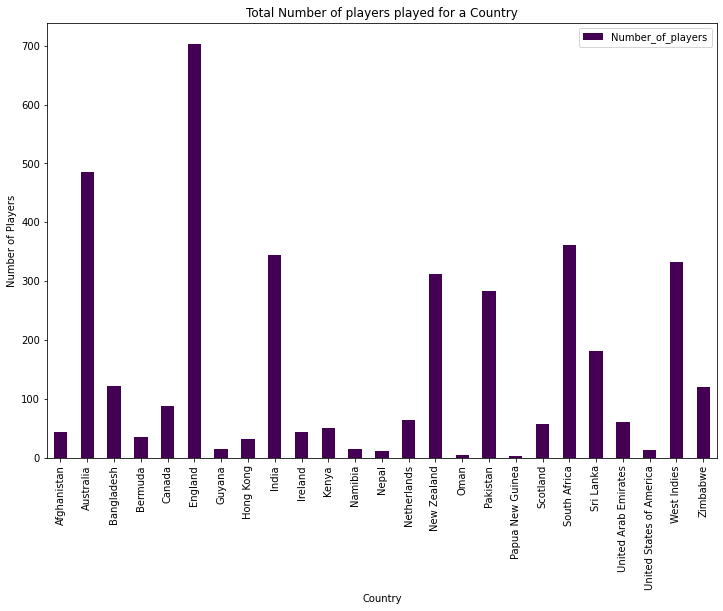

In [49]:
player_stats = plyr_data_df[['name','nationalTeam']].groupby(['nationalTeam']).size()
player_stats = player_stats.to_frame(name = 'Number_of_players').reset_index()
df_players = player_stats.sort_values(by=['nationalTeam' ],ascending=True)
df_players.head(2)

df_players.plot(kind='bar', x='nationalTeam', figsize=(12,8),colormap='viridis')
plt.title('Total Number of players played for a Country')
plt.xlabel ('Country')
plt.ylabel ('Number of Players')

In [53]:
def player_country (row):
   if row['nationalTeam'] == 'West Indies':
    return row['country']
   else:
    return row['nationalTeam']
   return 'Other'

col = plyr_data_df.apply(player_country, axis=1) # get column data with an index
plyr_data_df = plyr_data_df.assign(Player_country=col.values)

player_stats = plyr_data_df[['name','Player_country']].groupby(['Player_country']).size()
player_stats = player_stats.to_frame(name = 'Number_of_players').reset_index()
df_players = player_stats.sort_values(by=['Player_country' ],ascending=True)
df_players.head(2)

Player_country  Number_of_players
0    Afghanistan                 44
1       Anguilla                  1

**Analyze the teams winning performance in each format since begining of cricket. It would help to manually predict teams who will lead cricket in future**

In [55]:
def plot_line_chart(play_format):
    tm_mt_rslt_df_tmp = tm_mt_rslt_df[['Country','Result','Play_Format','Match_Year']][(tm_mt_rslt_df.Result=='Won') & (tm_mt_rslt_df.Play_Format==play_format)]
    tm_mt_rslt_df_tmp = tm_mt_rslt_df_tmp.groupby(['Country','Match_Year'])
    tm_mt_rslt_df_tmp=tm_mt_rslt_df_tmp.count().reset_index()[['Match_Year','Country','Result']]
    tm_mt_rslt_df_tmp=tm_mt_rslt_df_tmp.pivot(index='Match_Year', columns='Country', values='Result').replace(np.nan, 0).rolling(10).mean()
    g=sns.lineplot(data=tm_mt_rslt_df_tmp, palette="tab10", linewidth=2.5)
    g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g.set_title(str(play_format) + ' teams winning performance over the decades.')

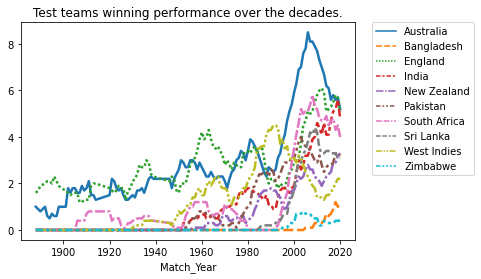

In [56]:
plot_line_chart('Test')

**Data Observations:**
- Australia and England are the longest player in test history and those are still in race of top teams
- India, New Zealand and South Africa joined the top performers race over the time.
- Pakistan, West Indies and Sri Lanka are lost their performance over the time in this format. 

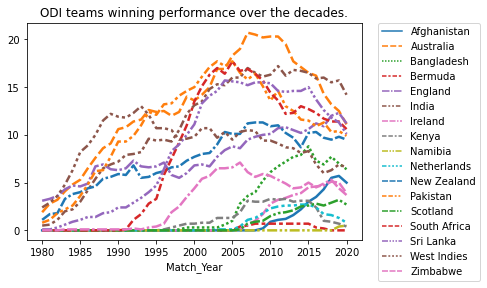

In [57]:
plot_line_chart('ODI')

**Data Observations:**
- There are multiple countries playing this fortmat since last 50 years and consistant with their performance.
- Australia, India, South Africa and England would be strong top 4 teams in this format.
- Next world cup 2 out of above 4 teams could reach up to finals.

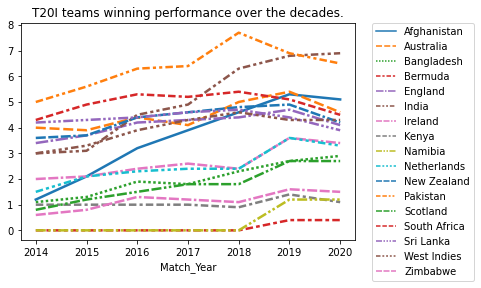

In [58]:
plot_line_chart('T20I')

**Data Observations:**
-	There are multiple countries playing this format since last 20 years and consistent with their performance.
-	Australia, India and Pakistan would be strong top 3 teams in this format.
-	Next world cup 2 out of above 3 teams could reach up to finals.

In [59]:
country_results = tm_mt_rslt_df[['Play_Format','Result','Margin','Match','Ground','Match_Date','Country']]
country_results = country_results[(country_results['Result'] =='Won') | (country_results['Result'] =='Lost') ]
country_results
df_cntry_sts = country_results.sort_values(by=['Play_Format' ,'Match','Ground','Match_Date'],ascending=True)
df_cntry_sts = df_cntry_sts.pivot(index=['Play_Format','Margin','Match','Ground','Match_Date'], 
                                   columns='Result', 
                                   values='Country').reset_index()
df_cntry_sts=df_cntry_sts[df_cntry_sts['Won'].notna()][df_cntry_sts['Lost'].notna()]

df_format_cntry_stats = df_cntry_sts.groupby(['Play_Format','Lost','Won'])['Lost'].count()
df_format_cntry_stats = df_format_cntry_stats.to_frame(name = 'Counts').reset_index()
df_format_cntry_stats

Play_Format         Lost           Won  Counts
0           ODI  Afghanistan     Australia       3
1           ODI  Afghanistan    Bangladesh       5
2           ODI  Afghanistan       England       2
3           ODI  Afghanistan         India       2
4           ODI  Afghanistan       Ireland      13
..          ...          ...           ...     ...
419        Test     Zimbabwe   New Zealand      11
420        Test     Zimbabwe      Pakistan      10
421        Test     Zimbabwe  South Africa       8
422        Test     Zimbabwe     Sri Lanka      14
423        Test     Zimbabwe   West Indies       7

[424 rows x 4 columns]

<Figure size 432x288 with 0 Axes>

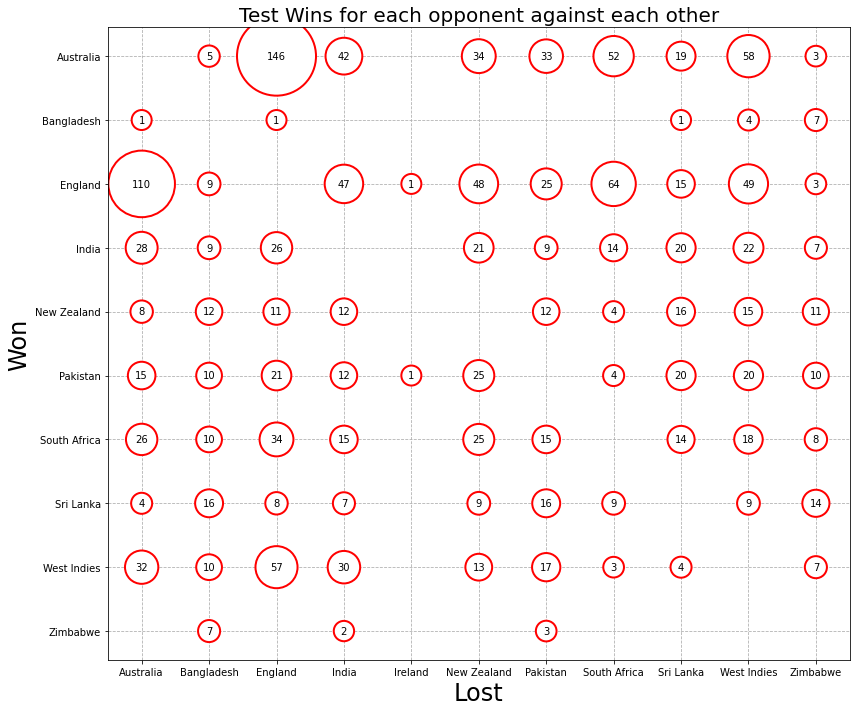

<Figure size 432x288 with 0 Axes>

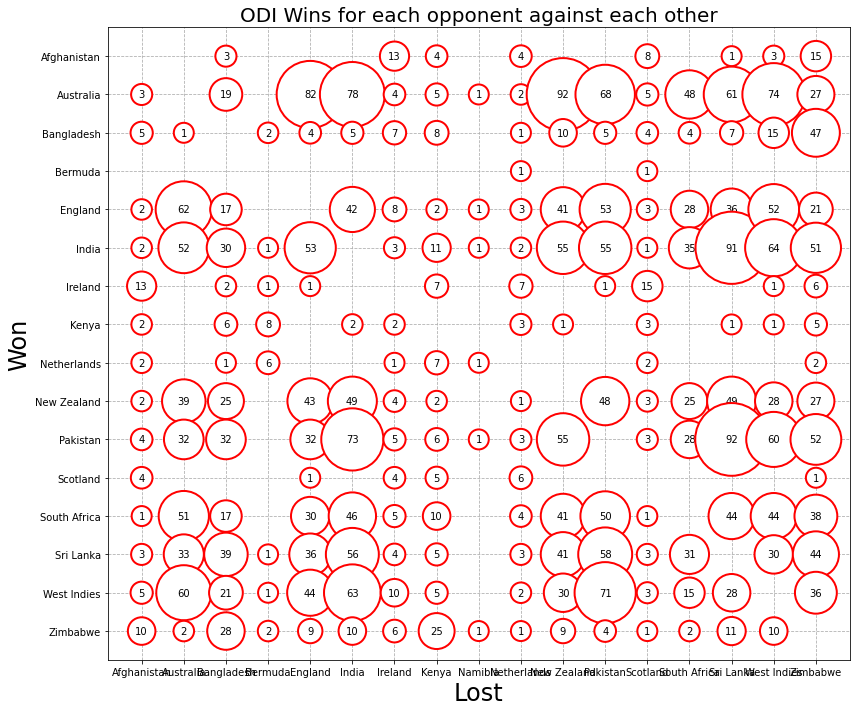

<Figure size 432x288 with 0 Axes>

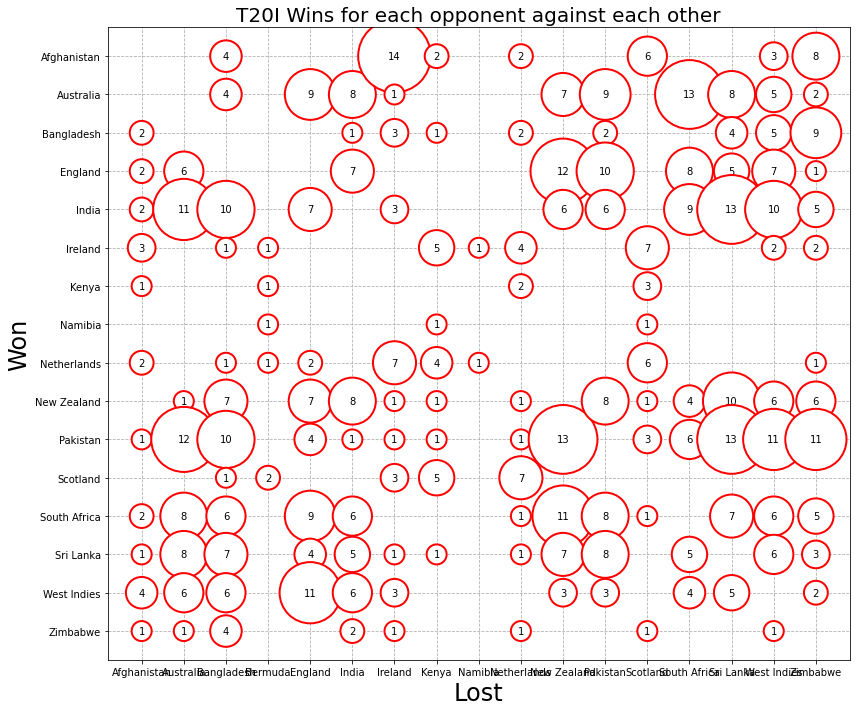

In [60]:
play_forms = ['Test','ODI','T20I']
for form in play_forms:
    df = df_format_cntry_stats[df_format_cntry_stats.Play_Format==form]
    #create padding column from values for circles that are neither too small nor too large
    df["padd"] = 2.5 * (df.Counts - df.Counts.min()) / (df.Counts.max() - df.Counts.min()) + 0.5
    fig = plt.figure()
    plt.subplots(figsize=(12,10))
    #prepare the axes for the plot - you can also order your categories at this step
    s = plt.scatter(sorted(df.Lost ), sorted(df.Won, reverse = True), s = 0)
    s.remove
    #plot data row-wise as text with circle radius according to Count
    for row in df.itertuples():
        bbox_props = dict(boxstyle = "circle, pad = {}".format(row.padd), fc = "w", ec = "r", lw = 2)
        plt.annotate(str(row.Counts), xy = (row.Lost, row.Won), bbox = bbox_props, ha="center", va="center", zorder = 2, clip_on = True)

    #plot grid behind markers
    plt.grid(ls = "--", zorder = 1)
    plt.xlabel('Lost', fontsize=24)
    plt.ylabel('Won',fontsize=24)
    plt.title(form + ' Wins for each opponent against each other', fontdict={'fontsize': 20, 'fontweight': 'medium'})
    #take care of long labels
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

**Data Observations:**

**Test:**
-	Above bubble plot if read horizontally then it’s showing number of wins of country on y-axis against the country on x-axis.
-	The visualization tuned more effective as with bubble size the number also present within the circle, so it’s easy to render the chart with human eyes.
-	As we can clearly see England and Australia are the top two countries having won most matches against each other, since they started playing cricket since a long time, as depicted by their number of wins, followed by South Africa, India, and West Indies 

**ODI:**
-	As we can clearly see Australia, India and Pakistan are the top countries having won most matches against each other, as depicted by their number of wins
-	This is followed by South Africa, England, and West Indies teams

**T20I:**
-	Most of the countries have won against each other.
